In [87]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import scipy.stats as stats
import seaborn as sns

%pwd
os.chdir('C:\\Users\\Prudhvi\\Desktop\\Prudhvi\\Data Science\\Data')
#os.chdir('C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data')
%pwd

'C:\\Users\\Prudhvi\\Desktop\\Prudhvi\\Data Science\\Data'

In [295]:
churn=pd.read_csv("Teleco_Cust_Attr.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [235]:
churn.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,6292-TOSSS,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [232]:
## Check for the kmissing values
NAs=pd.concat([churn.isnull().sum()],axis=1,keys=col)
NAs[NAs.sum(axis=1)>0]

# Filling missing Age values with mean
churn[‘TotalCharges’] = train[‘TotalCharges’].fillna(churn[‘TotalCharges’].mean())

## Filling missing values with the most repeated values 
churn[‘gender’] = churn[‘gender’].fillna(churn[‘gender’].mode()[0])

                  C
gender            0
SeniorCitizen     0
Partner           0
Dependents        0
tenure            0
PhoneService      0
MultipleLines     0
InternetService   0
OnlineSecurity    0
OnlineBackup      0
DeviceProtection  0
TechSupport       0
StreamingTV       0
StreamingMovies   0
Contract          0
PaperlessBilling  0
PaymentMethod     0
MonthlyCharges    0
Churn             0


,C


In [243]:
churn['gender'].mode()[0]

'Male'

In [296]:
churn.drop("customerID", axis = 1, inplace=True)
churn.drop("TotalCharges", axis = 1,  inplace=True)

In [297]:
## Data Type Conversion
churn["SeniorCitizen"]=churn["SeniorCitizen"].astype(object)

In [298]:
churn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [299]:
my_tab = pd.crosstab(index=churn["gender"],  # Make a crosstab
            columns="count")   # Name the count column
print(my_tab)
# Table of survival vs. sex Table o 
survived_sex = pd.crosstab(index=churn["Churn"], columns=churn["Partner"])
#survived_sex.index= ["Yes","No"]
print(survived_sex)

col_0   count
gender       
Female   3488
Male     3555
Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669


In [300]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [301]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
for i in churn.columns:
    if(churn[i].dtype.name=="object"):
        churn[i] = churn[i].astype("category")
        churn[i] = lc.fit_transform(churn[i])
        churn[i] = churn[i].astype("category")
        
# master_dataset.head(7)
churn.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
Churn               category
dtype: object

In [302]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
churn_cat=[]
churn_ncat=[]
for i in churn.columns:
    if(churn[i].dtype.name=="category"):
        if(len(churn[i].unique()) > 2):
            churn_cat.append(i) 
        else:
            churn_ncat.append(i)
    else:
        churn_ncat.append(i)
                 
churn_cat = churn[churn_cat]
churn_ncat = churn[churn_ncat]
churn_ncat.head(4)
churn_cat.head(4)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,1,0,0,2,0,0,0,0,0,2
1,0,0,2,0,2,0,0,0,1,3
2,0,0,2,2,0,0,0,0,0,3
3,1,0,2,0,2,2,0,0,1,0


In [155]:
churn['SeniorCitizen'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [303]:
churn.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.0,7043.0,7043.0,7043.0,7043.000000,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.000000,7043.0
unique,2.0,2.0,2.0,2.0,NaN,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,NaN,2.0
top,1.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,0.0
freq,3555.0,5901.0,3641.0,4933.0,NaN,6361.0,3390.0,3096.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0,3875.0,4171.0,2365.0,NaN,5174.0
mean,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [304]:
churn_cat = pd.get_dummies(churn_cat,drop_first=True)
churn_cat.head(5)

,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_1,OnlineBackup_2,DeviceProtection_1,DeviceProtection_2,...,TechSupport_2,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [305]:
fn_dataset = pd.merge(churn_cat,churn_ncat,left_index=True, right_index=True)
fn_dataset.head(5)

,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_1,OnlineBackup_2,DeviceProtection_1,DeviceProtection_2,...,PaymentMethod_3,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,29.85,0
1,0,0,0,0,0,1,0,0,0,1,...,1,1,0,0,0,34,1,0,56.95,0
2,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,2,1,1,53.85,1
3,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,45,0,0,42.30,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,70.70,1


In [306]:
X = fn_dataset.iloc[:,:-1]
Y = fn_dataset.iloc[:,-1:]

 X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

###### Decision Tree

In [307]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
print(clf)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [309]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [310]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
print("classification report of Train Dataset")
classificaiton_report_test=classification_report(y_test,y_pred_test)
print(classificaiton_report_test)

Confusion Matrix of Train Dataset
[[3875    1]
 [  14 1392]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3876
          1       1.00      0.99      0.99      1406

avg / total       1.00      1.00      1.00      5282

Confusion Matrix of test Dataset
[[1058  240]
 [ 231  232]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.82      0.82      0.82      1298
          1       0.49      0.50      0.50       463

avg / total       0.73      0.73      0.73      1761



In [311]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6580900338450582

###### max_depth
###### The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


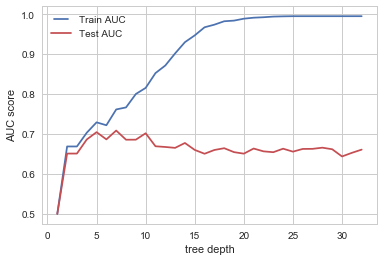

In [312]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
print(max_depths)
train_results = []
test_results = []
for max_depth in max_depths:
   #clf = tree.DecisionTreeClassifier()
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt=dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b' ,label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('tree depth')
plt.show()


###### We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

###### min_samples_split
###### min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


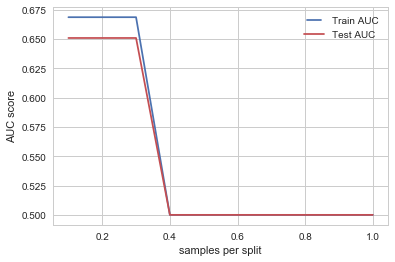

In [313]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   #clf = tree.DecisionTreeClassifier()
   dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt=dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b' ,label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('samples per split')
plt.show()


###### At 0.4 as the max_split_sample.... both test anda train are give almost same accuracy. Greater than 0.4 model is not learning any more

###### min_samples_leaf
###### min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

[0.1 0.2 0.3 0.4 0.5]


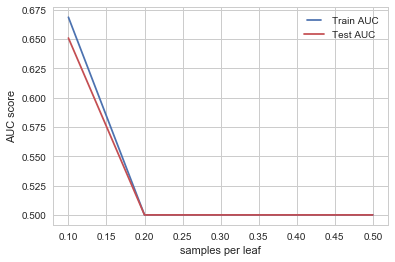

In [314]:
min_samples_leafs  = np.linspace(0.1, 0.5, 5, endpoint=True)
print(min_samples_leafs)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   #clf = tree.DecisionTreeClassifier()
   dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt=dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b' ,label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('samples per leaf')
plt.show()


###### When min samples per leaf is 10 both and train are performing well. As the sampels per leaf increases model is underfitting

### Building a model with the above assumptions:
###### min_samples_leaf=0.10
###### min_samples_split=0.3
###### max_depth=5

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=0.10,min_samples_split=0.3,max_depth=10)
clf=clf.fit(X_train,y_train)
print(clf)
y_pred_train = clf.predict_proba(X_train)
y_pred_test = clf.predict_proba(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
print("classification report of Train Dataset")
classificaiton_report_test=classification_report(y_test,y_pred_test)
print(classificaiton_report_test)

In [315]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=0.10,min_samples_split=0.3,max_depth=10)
clf=clf.fit(X_train,y_train)
print(clf)
y_pred_train_p = clf.predict_proba(X_train)
y_pred_test_p = clf.predict_proba(X_test)
y_pred_test = clf.predict(X_test)
print(y_pred_test_p)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[0.90873405 0.09126595]
 [0.72333333 0.27666667]
 [0.70446097 0.29553903]
 ...
 [0.9849711  0.0150289 ]
 [0.9849711  0.0150289 ]
 [0.90873405 0.09126595]]


In [359]:
print(range(len(y_pred_train_p)))
y_pred_train_p[0][0]
a=len(y_pred_train_p)
X_train['prediction_train']=0

for i in range(len(y_pred_train_p)):
    if(y_pred_train_p[i][0]>0.65):
        X_train.iloc[i]
    else:
        X_train['prediction_train']=1

X_train.head(14)

range(0, 5282)


,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_1,OnlineBackup_2,DeviceProtection_1,DeviceProtection_2,...,PaymentMethod_3,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,prediction_train
3296,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,24,1,1,49.30,0
6397,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,54,1,0,65.25,0
6043,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,3,0,1,40.15,0
5309,0,0,0,1,1,0,1,0,1,0,...,0,0,0,1,0,61,1,0,20.25,0
3000,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,12,1,1,84.45,0
3101,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,58,1,1,79.80,0
2868,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,26,1,1,85.75,0
4322,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,70.15,0
282,0,1,0,1,1,0,1,0,1,0,...,1,0,0,0,1,1,1,0,25.40,0
2111,0,0,0,1,1,0,1,0,1,0,...,1,1,0,1,1,30,1,0,21.25,0


In [349]:
print(X_train.prediction_train.unique())
print(y_pred_train_p[12][0])
print(y_pred_train_p[12][1])

['0']
0.3102189781021898
0.6897810218978102


In [356]:
X_train.drop("prediction_train", axis = 1,  inplace=True)

In [358]:
X_train['prediction_train']=0


In [362]:
 X_train.loc[1:1,1:1]

KeyError: 1